In [2]:
import os
import pandas as pd
import numpy as np


data = pd.read_csv("/CC_DATA.csv")
data = data.dropna()
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


#Our aim is to group data into N groups. First we shud see which all columns are needed
We do not need CUST_ID for calculating distance. CUST_ID is needed only for showing to final customer

In [5]:
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [6]:
cust_id= data["CUST_ID"]
data = data.drop("CUST_ID",axis=1) # axis 1 means column

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
data_norm = sc.fit_transform(data)


In [7]:
data_norm

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

In [8]:
data_norm = pd.DataFrame(data_norm)
data_norm.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


In [9]:
#There is nothing mandatory that the clustering algorithm works only on normalized data
from sklearn.cluster import KMeans


In [87]:
clust_mod=KMeans(n_clusters=3,random_state=0)  # random_state is needed to produce the same data all the time
clust_mod.fit(data_norm)
group=clust_mod.predict(data_norm)
#In supervised learning,fit uses train data and predict uses test data.
#But here both are data_norm

In [88]:
group1= pd.DataFrame(group)
group1.head(10)

,0
0,0
1,1
2,0
3,0
4,0
5,2
6,0
7,0
8,0
9,0


In [89]:
grp_cust=pd.concat([cust_id,group1],axis=1)
grp_cust.head

<bound method NDFrame.head of      CUST_ID    0
0     C10001  0.0
1     C10002  1.0
2     C10003  0.0
4     C10005  0.0
5     C10006  2.0
...      ...  ...
8565     NaN  0.0
8583     NaN  0.0
8593     NaN  0.0
8596     NaN  0.0
8619     NaN  0.0

[8933 rows x 2 columns]>

In [90]:
grp_cust=grp_cust.rename(columns={0:"cluster_label"})

In [91]:
grp_cust

,CUST_ID,cluster_label
0,C10001,0.0
1,C10002,1.0
2,C10003,0.0
4,C10005,0.0
5,C10006,2.0
...,...,...
8565,NaN,0.0
8583,NaN,0.0
8593,NaN,0.0
8596,NaN,0.0


In [92]:
grp1 = grp_cust[grp_cust["cluster_label"]==0]
grp2 = grp_cust[grp_cust["cluster_label"]==1]
grp3 = grp_cust[grp_cust["cluster_label"]==2]

In [51]:
grp1

,CUST_ID,cluster_label
0,C10001,0.0
2,C10003,0.0
4,C10005,0.0
6,C10007,0.0
7,C10008,0.0
...,...,...
8565,NaN,0.0
8583,NaN,0.0
8593,NaN,0.0
8596,NaN,0.0


In [93]:
cent=clust_mod.cluster_centers_


In [94]:
cent.shape

(3, 17)

In [95]:
cent=pd.DataFrame(cent)
cent.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.370560,-0.170258,-0.232873,-0.204207,-0.175188,-0.313423,-0.057564,-0.232504,-0.046810,-0.337880,-0.302375,-0.244503,-0.342733,-0.288127,-0.139746,0.017121,-0.023759
1,1.142945,0.311356,-0.297007,-0.212825,-0.311166,1.358765,-0.657754,-0.317830,-0.563865,1.537993,1.321847,-0.375319,0.592137,0.438002,0.397949,-0.422910,-0.138644
2,0.309706,0.420092,1.513900,1.265661,1.252888,-0.247490,1.133519,1.539169,0.959429,-0.361922,-0.253033,1.671992,0.890653,0.826443,0.159780,0.466608,0.295239


In [96]:
cent1= sc.inverse_transform(cent)
cent1 = pd.DataFrame(cent1)
cent1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,824.734641,0.859675,520.801218,260.973897,260.162526,329.300549,0.472903,0.136149,0.350187,0.069427,1.223873,8.876878,3268.019738,946.132403,532.767786,0.164376,11.503245
1,3996.208536,0.959699,381.825067,246.458962,135.444825,3876.570972,0.232077,0.110548,0.144363,0.447940,12.450668,5.583068,6688.736184,3058.905745,1808.411270,0.034015,11.352642
2,2250.197275,0.982282,4306.027982,2736.541481,1569.982779,469.166921,0.950824,0.667715,0.750740,0.064576,1.564930,57.132341,7781.017370,4189.132000,1243.370744,0.297538,11.921423


In [97]:
cent1.columns=data.columns

In [98]:
cent1.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,824.734641,0.859675,520.801218,260.973897,260.162526,329.300549,0.472903,0.136149,0.350187,0.069427,1.223873,8.876878,3268.019738,946.132403,532.767786,0.164376,11.503245
1,3996.208536,0.959699,381.825067,246.458962,135.444825,3876.570972,0.232077,0.110548,0.144363,0.447940,12.450668,5.583068,6688.736184,3058.905745,1808.411270,0.034015,11.352642
2,2250.197275,0.982282,4306.027982,2736.541481,1569.982779,469.166921,0.950824,0.667715,0.750740,0.064576,1.564930,57.132341,7781.017370,4189.132000,1243.370744,0.297538,11.921423


#PCA(Principal Component Analysis) is a dimentionality reduction technique.
It is a feature engineering technique .It is not typical feature reduction.
It reduces the number of columns.But the new columns will have the characteristics of the reduced columns

In [108]:
from sklearn.decomposition import PCA
pca= PCA(2)
pcafit= pca.fit(data_norm)
pcadata= pcafit.fit_transform(data_norm)


In [106]:
pcadata.shape

(8636, 2)

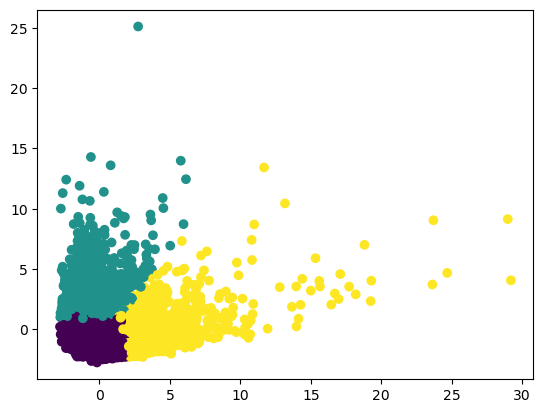

In [109]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(pcadata[:,0],pcadata[:,1],c=group)

In [ ]:
#Since there are no overlapping in the scatter plot, we can infer that k=3 is correct

Silhoutee Score is the measure of the distance between 2 clusters
The distance between the centroid of the clusters should be maximum


In [114]:
from sklearn.metrics import silhouette_score  ## accuracy score,ROC are other functions from sklearn.metrics which is used to measure the performance of classification algorithm
#Silhoette score is a measure of the performance of clustering algorithm
k=[2,3,4,5,8]
for i in k:
    mod=KMeans(i,random_state=0)
    modfit= mod.fit(data_norm)
    sil_grp=modfit.predict(data_norm)
    score= silhouette_score(data_norm,sil_grp)
    print("The Silhouette score for cluster {} is {}:".format(i,score))
    #The cluster with maximum silhouette score(maximum distance between clusters) is the ideal one.
    #So k=3 is the ideal one

The Silhouette score for cluster 2 is 0.20892328220228673:
The Silhouette score for cluster 3 is 0.24764339841031227:
The Silhouette score for cluster 4 is 0.19703675772374923:
The Silhouette score for cluster 5 is 0.19236088292982995:
The Silhouette score for cluster 8 is 0.21198434081381115:


#Elbow curve is also used to measure the performance.But silhouette score is the ideal one
Elbow Curve is plotted by using "within cluster error".Means within the cluster the distance between the points shud 
be minimum
As the number of clusters increases,the distance btwn points in the cluster reduces.But elbow curve shows that
at one cluster,the distance between the points drastaically reduces and after that its somewhat the same.

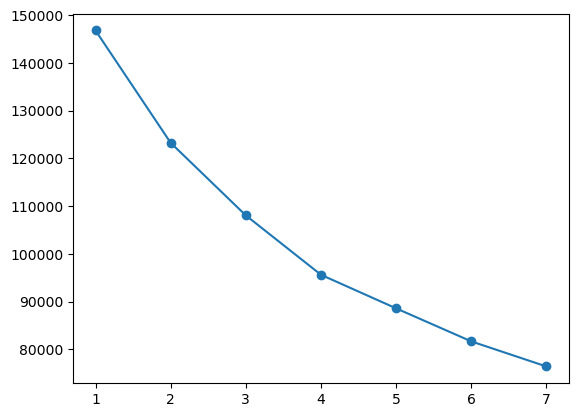

In [116]:
clust_range=range(1,8)
clust_err=[]
for num_clust in clust_range:
    clusters= KMeans(num_clust)
    clusters.fit(data_norm)
    clust_err.append(clusters.inertia_)
    
import pandas as pd
clusters_df= pd.DataFrame({"num_clusters":clust_range,"cluster_errors":clust_err})
clusters_df[0:10]

plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker="o")

In [ ]:
#From the elbow curve,its little difficult to identify whick k value is the apt.
#So the best performance measure is silhouette score

In [ ]:
#KMeans is a powerful segmentation algorithm - for image processing